In [13]:
from mnist.loader import MNIST
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [14]:
mndata = MNIST('data_files')
mndata.gz = True
images, labels = mndata.load_training()
train_x = np.array(images)
train_y = np.array(labels)

images, labels = mndata.load_testing()
test_x = np.array(images)
test_y = np.array(labels)

In [15]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
train_x = train_x / 255
test_x = test_x / 255

enc = OneHotEncoder(sparse=False, categories='auto')
train_y = enc.fit_transform(train_y.reshape(len(train_y), -1))
test_y = enc.transform(test_y.reshape(len(test_y), -1))

In [17]:
test_y.shape

(10000, 10)

In [18]:
print("Ukuran Train X : " + str(train_x.shape))
print("Ukuran Test X : " + str(test_x.shape))

Ukuran Train X : (60000, 784)
Ukuran Test X : (10000, 784)


In [19]:
#Inisialisasi Variabel Parameter
ukuran_layer = [15,10]
parameter = {}
L = len(ukuran_layer)
n = train_x.shape[1]
cost = []
lr = 0.1
iterasi = 200

In [20]:
#Inisialisasi nilai bobot dan bias
np.random.seed(1)
ukuran_layer.insert(0, train_x.shape[1])
for l in range(1, len(ukuran_layer)):
    np.random.seed(1)
    parameter["W" + str(l)] = np.random.randn(ukuran_layer[l], ukuran_layer[l-1]) / np.sqrt(ukuran_layer[l-1])
    parameter["b" + str(l)] = np.zeros((ukuran_layer[l], 1))

In [21]:
def akurasi(X, Y):
    #Propagasi Maju
    #buat variabel untuk menampung perhitungan perkalian
    simpan = {}
    
    #buat transpose matrix data
    A = X.T
    #iterasi perhitungan silang data dengan bobot dan bias
    for jj in range(L-1):
        Z = parameter["W" + str(jj+1)].dot(A) + parameter["b" + str(jj + 1)]
        #Sigmoid
        A = 1 / (1 + np.exp(-Z))
        simpan["A" + str(jj + 1)] = A
        simpan["W" + str(jj + 1)] = parameter["W" + str(jj + 1)]
        simpan["Z" + str(jj + 1)] = Z
    
    
    Z = parameter["W" + str(L)].dot(A) + parameter["b" + str(L)]
    #Softmax
    exponenZ = np.exp(Z - np.max(Z))
    A = exponenZ / exponenZ.sum(axis=0, keepdims=True)
    simpan["A" + str(L)] = A
    simpan["W" + str(L)] = parameter["W" + str(L)]
    simpan["Z" + str(L)] = Z

    y_hat = np.argmax(A, axis=0)
    Y = np.argmax(Y, axis=1)
    akurasi = (y_hat == Y).mean()
    return akurasi * 100

def prediksi(X):
    #Propagasi Maju
    #buat variabel untuk menampung perhitungan perkalian
    simpan = {}
    
    #buat transpose matrix data
    A = X.T
    #iterasi perhitungan silang data dengan bobot dan bias
    for jj in range(L-1):
        Z = parameter["W" + str(jj+1)].dot(A) + parameter["b" + str(jj + 1)]
        #Sigmoid
        A = 1 / (1 + np.exp(-Z))
        simpan["A" + str(jj + 1)] = A
        simpan["W" + str(jj + 1)] = parameter["W" + str(jj + 1)]
        simpan["Z" + str(jj + 1)] = Z
    
    
    Z = parameter["W" + str(L)].dot(A) + parameter["b" + str(L)]
    #Softmax
    exponenZ = np.exp(Z - np.max(Z))
    A = exponenZ / exponenZ.sum(axis=0, keepdims=True)
    simpan["A" + str(L)] = A
    simpan["W" + str(L)] = parameter["W" + str(L)]
    simpan["Z" + str(L)] = Z

    y_hat = np.argmax(A, axis=0)
    return y_hat

In [24]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = printEnd)
    if iteration == total-1: 
        print()


In [25]:
#Iterasi Pelatihan

costs = []
ulangAwal = 0
ulangAkhir = 100
for i in range(iterasi):
    #Propagasi Maju
    #buat variabel untuk menampung perhitungan perkalian
    simpan = {}
    
    #buat transpose matrix data
    A = train_x.T
    #iterasi perhitungan silang data dengan bobot dan bias
    for jj in range(L-1):
        Z = parameter["W" + str(jj+1)].dot(A) + parameter["b" + str(jj + 1)]
        #Sigmoid
        A = 1 / (1 + np.exp(-Z))
        simpan["A" + str(jj + 1)] = A
        simpan["W" + str(jj + 1)] = parameter["W" + str(jj + 1)]
        simpan["Z" + str(jj + 1)] = Z
    
    
    Z = parameter["W" + str(L)].dot(A) + parameter["b" + str(L)]
    #Softmax
    exponenZ = np.exp(Z - np.max(Z))
    A = exponenZ / exponenZ.sum(axis=0, keepdims=True)
    simpan["A" + str(L)] = A
    simpan["W" + str(L)] = parameter["W" + str(L)]
    simpan["Z" + str(L)] = Z

    
    #Hitung Error Cost
    cost = -np.mean(train_y * np.log(A.T))
    
    #Propagasi balik
    derivative = {}
    simpan["A0"] = train_x.T
    A = simpan["A" + str(L)]
    dZ = A - train_y.T

    dW = dZ.dot(simpan["A" + str(L - 1)].T) / n
    db = np.sum(dZ, axis=1, keepdims=True) / n
    dAPrev = simpan["W" + str(L)].T.dot(dZ)
    
    derivative["dW" + str(L)] = dW
    derivative["db" + str(L)] = db
    
    for j in range(L - 1, 0, -1):
        s = 1 / (1 + np.exp(simpan["Z" + str(j)]))
        dZ = dAPrev * (s * (1 - s))
        dW = 1. / n * dZ.dot(simpan["A" + str(j -1)].T)
        db = 1. / n * np.sum(dZ, axis=1, keepdims=True)
        
        if j > 1:
            dAPrev = simpan["W" + str(j)].T.dot(dZ)
        
        derivative["dW" + str(j)] = dW
        derivative["db" + str(j)] = db
    
    
    #Update bobot
    for jj in range(1, L + 1):
        parameter["W" + str(jj)] = parameter["W" + str(jj)] - lr * derivative["dW" + str(jj)]
        parameter["b" + str(jj)] = parameter["b" + str(jj)] - lr * derivative["db" + str(jj)]
    
    ulangAwal = ulangAwal + 1
    if i % 100 == 0:
        ulangAwal = 0
        ulangAkhir = 100
        print( "(",(i),"/",iterasi,")", "loss : ", cost, "Train Accuracy : ", akurasi(train_x, train_y))
        
    if i % 10 == 0:
        costs.append(cost)
    
    printProgressBar(ulangAwal, ulangAkhir, prefix = 'Progress:', suffix = 'Complete', length = 50)
    


( 0 / 200 ) loss :  0.034273418085365985 Train Accuracy :  91.03333333333333
Progress: |█████████████████████████████████████████████████-| 99.0% Complete
( 100 / 200 ) loss :  0.0277902649881199 Train Accuracy :  92.34833333333333
Progress: |█████████████████████████████████████████████████-| 99.0% Complete


Train Accuracy: 93.79333333333332
Test Accuracy: 93.34


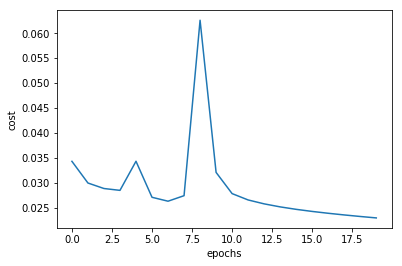

In [26]:
print("Train Accuracy:", akurasi(train_x, train_y))
print("Test Accuracy:", akurasi(test_x, test_y))

#PLOT EPOCH DENGAN TRAINING DAN TESTING BELUM
plt.figure()
plt.plot(np.arange(len(costs)), costs)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

Hasil prediksi :  7
Jawaban dari test_y :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


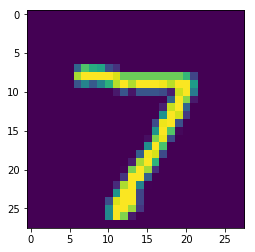

In [27]:
index = 0
hasil = prediksi(test_x)

print("Hasil prediksi : " , hasil[index])
print("Jawaban dari test_y : " , test_y[index])
plt.imshow(test_x[index].reshape((28,28)))
plt.show()